In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
library("factoextra")
library("maptree")
library(repr)
library("igraph")

corrplot 0.92 loaded

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Warning message:
“package ‘data.table’ was built under R version 4.2.2”

Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: cluster

Loading required package: rpart


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
coefsAll <- as.data.frame(read.csv(file.path(projectDir,"MixedEffectLMOutputs","ME_LMBetaCoefsALL.csv"), 
                                   row.names = 1),
                          stringsAsFactors = FALSE)

coefsAll <- coefsAll[rownames(coefsAll) %ni% c("Intercept", "n_genes", "mt_frac", "Group Var"),]

pValsAllAdj <- as.data.frame(read.csv(file.path(projectDir,"MixedEffectLMOutputs","ME_LMBetaFDRALL.csv"), 
                     row.names = 1), stringsAsFactors = FALSE)

# pValsAll <- as.data.frame(read.csv(file.path(projectDir,"MixedEffectLMOutputs","ME_LMPValuesALL.csv"), 
#                      row.names = 1), stringsAsFactors = FALSE)
# pValsAll <- pValsAll[rownames(pValsAll) %ni% c("Intercept", "n_genes", "mt_frac", "Group Var"),]

# pValsAllAdj <- as.data.frame(sapply(pValsAll, function(x){
#     p.adjust(x, method = "fdr", n = length(x))}))
# rownames(pValsAllAdj) = rownames(pValsAll) 
# write.csv(pValsAllAdj, file.path(projectDir,"MixedEffectLMOutputs","ME_LMBetaFDRALL.csv"))

In [3]:
guideModules = read.csv("./../TextFiles/ME_GuideModules_leiden_6_Modules.csv", row.names = 1)
guideModules$GuideName <- NULL
guideModules$GuideGroup <- paste0("K", guideModules$GuideGroup)
guideModules$GuideGroup <- factor(guideModules$GuideGroup)



In [4]:
head(guideModules)

,GuideGroup,GuideColor
,<fct>,<chr>
Aamp,K4,#aa40fc
Bop1,K4,#aa40fc
Cirh1a,K4,#aa40fc
Dcaf13,K4,#aa40fc
Grb2,K4,#aa40fc
Myc,K4,#aa40fc


In [5]:
rownames(coefsAll) = sapply(rownames(coefsAll), function(x){strsplit(as.character(x),"_")[[1]][2]})
rownames(pValsAllAdj) = sapply(rownames(pValsAllAdj), function(x){strsplit(as.character(x),"_")[[1]][2]})
coefsAll[pValsAllAdj > 0.1 ] = 0

In [6]:
coefsAllSign = as.data.frame(read.csv(file.path(projectDir,"MixedEffectLMOutputs","ME_SignificantBetaCoefs.csv"),
                                      row.names = 1),
                             stringsAsFactors = FALSE)
rownames(coefsAllSign) = sapply(rownames(coefsAllSign),
                                function(x){strsplit(as.character(x),"_")[[1]][2]})
pValsAllAdjSgn <- pValsAllAdj[rownames(coefsAllSign), colnames(coefsAllSign)]
coefsAllSign[pValsAllAdjSgn > 0.1] = 0
#write.csv(coefsAllSign, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_SignificantBetaCoefs_Insg0.csv")

In [7]:
dim(coefsAll)

[1] 1031 6685

In [8]:
coefsAll$Rfwd2 = coefsAll$Cop1
coefsAll$Tceb1 = coefsAll$Eloc  
coefsAll$Tceb3 = coefsAll$Eloa
coefsAll$Vprbp = coefsAll$Dcaf1  
coefsAll$Tceb2 = coefsAll$Elob

In [9]:
koGuideNames <- rownames(coefsAll)
length(koGuideNames)

[1] 1031

In [10]:
sgnkoGuideNames <- rownames(coefsAllSign)
length(sgnkoGuideNames)

[1] 329

In [11]:
availKOs = koGuideNames[koGuideNames %in% colnames(coefsAll)]
length(availKOs)

[1] 544

In [12]:
coefsAllE3s = coefsAll[availKOs, availKOs]
dim(coefsAllE3s)

[1] 544 544

In [13]:
availKOsSgn = sgnkoGuideNames[sgnkoGuideNames %in% colnames(coefsAll)]
length(availKOsSgn)

[1] 255

In [14]:
realE3s = as.data.frame(read.csv(file.path(projectDir,"ManuscriptFigures","220610_regulators_metadata_E3_Complex.csv")),
                             stringsAsFactors = FALSE)
e3s = unique(realE3s$Symbol_guides)
e3s = e3s[e3s != '']

In [15]:
length(e3s)

[1] 165

In [16]:
availE3s = e3s[e3s %in% colnames(coefsAll)]
length(availE3s)

[1] 136

In [17]:

e3s[e3s %ni% colnames(coefsAll)]

[1] "E4f1"     "Brca1"    "Cblc"     "Ring1"    "Siah1a"   "Traf3ip2"
 [7] "Trim7"    "Wdhd1"    "Rnf113a1" "Rnf135"   "Trim24"   "Rnf144a" 
[13] "Hectd3"   "Trim45"   "Kbtbd13"  "Klhl3"    "Katnb1"   "Lrr1"    
[19] "Ccnf"     "Fbxo42"   "Bid"      "Klhl7"    "Dcaf4"    "Fbxl13"  
[25] "Grb10"    "Kctd13"   "Kctd21"   "Det1"     "Bcl6"

In [18]:
k = diag(as.matrix(coefsAllE3s))

In [19]:
length(k[k != 0])

[1] 139

In [20]:
length(k[k > 0])

[1] 4

In [21]:
length(k[k < 0])

[1] 135

In [22]:
k[k == 0]

Abtb1    Acaca   Ahctf1      Ahr   Ambra1  Anapc10   Anapc1   Anapc2 
       0        0        0        0        0        0        0        0 
  Anapc4   Anapc7    Apaf1      Apc    Arel1    Arih2    Armc8     Arnt 
       0        0        0        0        0        0        0        0 
   Arrb1  Atg16l1     Atg5    Atxn3    Bach1    Baz1b     Bfar    Birc2 
       0        0        0        0        0        0        0        0 
   Birc3     Bmi1     Bptf     Brap    Brwd1    Brwd3    Btbd7    Btbd9 
       0        0        0        0        0        0        0        0 
   Ccnb2    Ccnd1    Cd2ap    Cdc16    Cdc26    Cdc27    Cdc34    Cdc40 
       0        0        0        0        0        0        0        0 
    Cdk5   Cdkn1b   Cgrrf1     Chfr    Ciao1     Cish    Cnot4     Copa 
       0        0        0        0        0        0        0        0 
   Coro7     Crbn    Cstf1     Cul2    Cul4b     Cyld     Dars      Dbt 
       0        0        0        0        0        0        0        0 
  Dcaf10   Dcaf11   Dcaf13    Dcaf5  Dcun1d1  Dcun1d3  Dcun1d5     Dda1 
       0        0        0        0        0        0        0        0 
   Ddx41    Ddx58   Dennd3    Dido1    Dmxl1    Dmxl2     Dpf2     Dtx2 
       0        0        0        0        0        0        0        0 
    Dtx3    Dtx3l      Eed     Eml2     Eml3      Fas     Fasn   Fbxl14 
       0        0        0        0        0        0        0        0 
  Fbxl15    Fbxl3    Fbxl5   Fbxo11   Fbxo18   Fbxo28   Fbxo33    Fbxo6 
       0        0        0        0        0        0        0        0 
   Fbxo9    Fbxw5    Fbxw7    Fbxw8    Fem1b    Fem1c     Fmr1     G2e3 
       0        0        0        0        0        0        0        0 
     Gan    Gmcl1     Gmnn   Gtf3c1   Gtf3c2     Gzf1    H2afx    Herc2 
       0        0        0        0        0        0        0        0 
   Herc4    Herc6     Hira     Hltf    Htra2     Ibtk   Ifnar1    Ikbkg 
       0        0        0        0        0        0        0        0 
    Ing2     Ing4     Ing5   Ints12     Irf8    Isg15 Ivns1abp    Jade1 
       0        0        0        0        0        0        0        0 
     Jun    Kat2b    Kat6a   Kbtbd2    Kcmf1   Kctd10   Kctd17    Kctd2 
       0        0        0        0        0        0        0        0 
   Kctd9    Kdm2a    Kdm2b    Kdm4a    Kdm5a    Kdm5b    Kdm7a    Keap1 
       0        0        0        0        0        0        0        0 
  Klhl20   Klhl24   Klhl28    Klhl5    Klhl9    Kmt2a    Kmt2b    Kmt2c 
       0        0        0        0        0        0        0        0 
   Kmt2d   Lonrf1   Lonrf3   Lrrc41    Lrrk2     Ltbr     Ltn1    Lztr1 
       0        0        0        0        0        0        0        0 
  Map2k4   Map3k1   Map3k7   Mapk14    Mapk7    Mapk8   March1   March2 
       0        0        0        0        0        0        0        0 
  March5   March7   March8     Mavs     Mdm4     Med8    Mex3c     Mid1 
       0        0        0        0        0        0        0        0 
   Mkrn1    Mnat1     Msl2     Mtf2    Mthfs   Mthfsl     Mtor     Mul1 
       0        0        0        0        0        0        0        0 
     Myc   Mycbp2    Mylip   Nbeal1   Ndfip1    Nedd1   Neurl3      Nf1 
       0        0        0        0        0        0        0        0 
  Nfatc1   Nfatc3     Nfx1    Nosip    Nr1h3    Nr3c1    Nrip1     Nsd1 
       0        0        0        0        0        0        0        0 
  Nsmce1    Nup62      Ogt    Ostm1     Paf1    Parp9    Pcgf5    Pcif1 
       0        0        0        0        0        0        0        0 
   Peli1    Peli2     Pex2     Pex7    Phf10    Phf14   Phf21a     Phf2 
       0        0        0        0        0        0        0        0 
    Phf8     Phip    Pias1    Pias4    Plrg1    Pparg    Ppil2  Ppp1r11 
       0        0        0        0        0        0        0        0 
 Ppp2r2d    Ppwd1     Prc1     Preb   Prpf19    Prpf4   Ptpn1

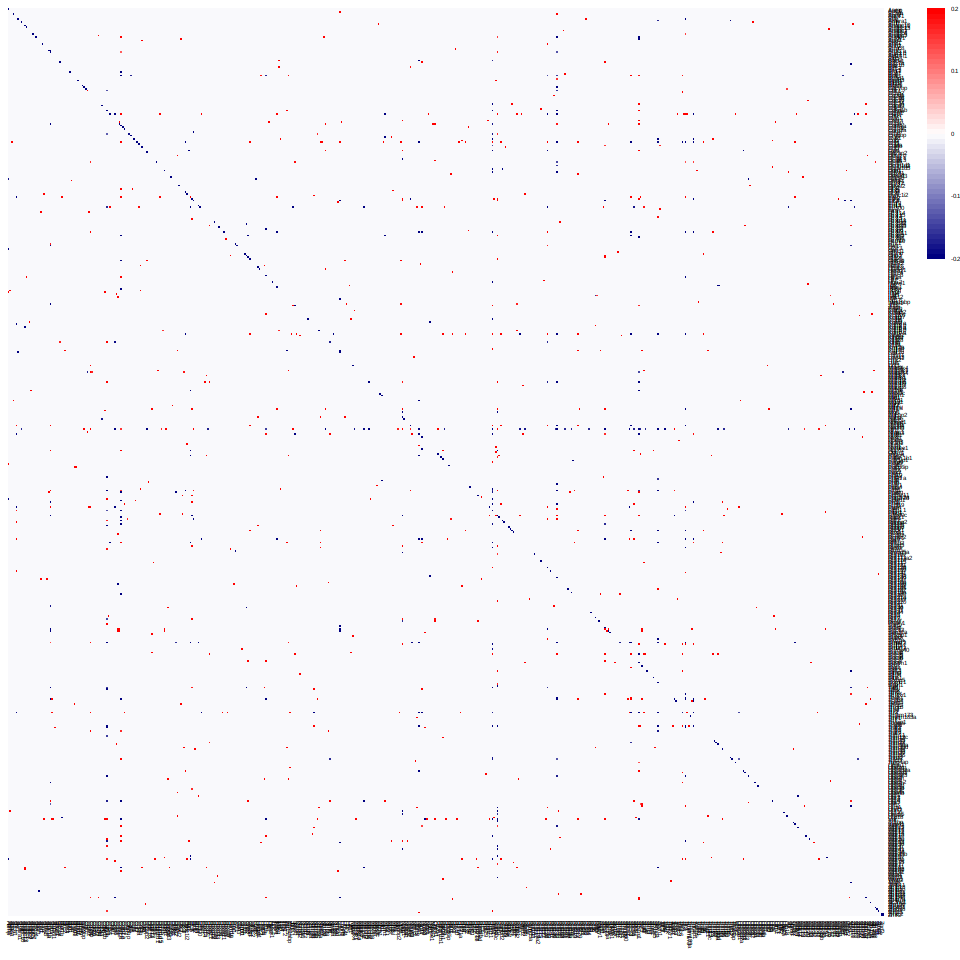

In [23]:
coefsAllE3s = coefsAll[availKOs, availKOs]
options(repr.plot.width=8, repr.plot.height=8)

coefsAllE3s[coefsAllE3s > 0.2] = 0.2
coefsAllE3s[coefsAllE3s < -0.2] = -0.2

xx <- pheatmap(coefsAllE3s, treeheight_col=0, treeheight_row=0, fontsize = 3,
         cluster_rows=FALSE, cluster_cols=FALSE, color=colorRampPalette(c("navy", "white", "red"))(50))

#save_pheatmap_pdf(xx, "../SupplementaryFigures/S_1H.pdf", width=4, height=4)

In [24]:
coefsAllE3s = coefsAll[e3s, availE3s]

commonNames = rownames(coefsAllE3s)[rownames(coefsAllE3s) %in% colnames(coefsAllE3s)]
for(elem in commonNames){
    coefsAllE3s[elem,elem] = 0
}



dim(coefsAllE3s)

[1] 165 136

In [25]:
nonzeroVals = apply(coefsAllE3s,1, function(x){length(x[x!= 0])})
nonzeroVals = nonzeroVals[nonzeroVals > 0]
coefsAllE3s = coefsAllE3s[names(nonzeroVals),]


dim(coefsAllE3s)

[1]  60 136

In [26]:
nonzeroEfGenes = apply(coefsAllE3s,2, function(x){length(x[x!= 0])})
nonzeroEfGenes = nonzeroEfGenes[nonzeroEfGenes > 0]
coefsAllE3s = coefsAllE3s[,names(nonzeroEfGenes)]
dim(coefsAllE3s)

[1] 60 37

In [27]:
dim(coefsAllSign)

[1]  329 1041

In [28]:
colnames(coefsAllE3s) %in% colnames(coefsAllSign)

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[37] FALSE

png 
  2

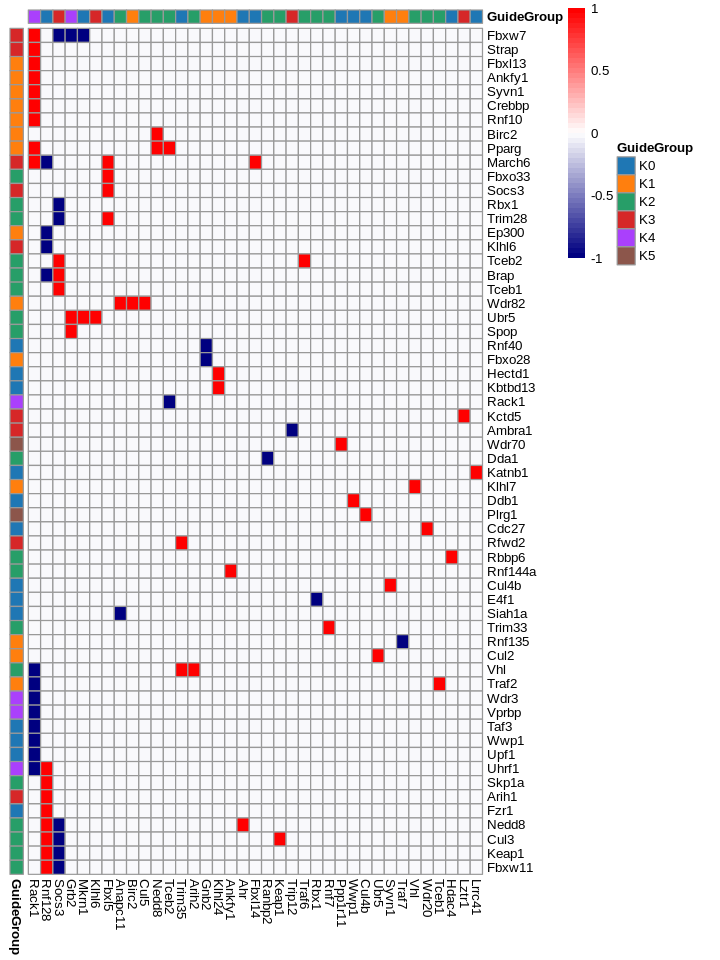

In [49]:
options(repr.plot.width=6, repr.plot.height=8)

annoCols<-list(GeneGroup=c(G0='#A6CEE3',
                           G1='#1F78B4',
                           G2='#B2DF8A',
                           G3='#33A02C', 
                           G4='#FB9A99', 
                           G5='#FDBF6F', 
                           G6='#FF7F00', 
                           G7='#CAB2D6',
                           G8='#6A3D9A', 
                           G9='#FFFF99', 
                           G10="#B5651D" ),
                 GuideGroup=c(K0="#1f77b4",
                              K1="#ff7f0e",
                              K2="#279e68",
                              K3="#d62728", 
                              K4="#aa40fc", 
                              K5="#8c564b"))
   
coefsAllE3s[coefsAllE3s > 0] = 1
coefsAllE3s[coefsAllE3s < 0] = -1

annotDFcol <- guideModules[colnames(coefsAllE3s),]
annotDFrow <- guideModules[rownames(coefsAllE3s),]

annotDFcol$GuideColor = NULL
annotDFrow$GuideColor = NULL

xx <- pheatmap(coefsAllE3s, 
               treeheight_col=0, 
               treeheight_row=0, 
               fontsize = 8,
               clustering_method = "ward.D2",
               cluster_rows=TRUE,
               cluster_cols=TRUE, 
            annotation_col = annotDFcol,
            annotation_row = annotDFrow,
            annotation_colors = annoCols,
               color=colorRampPalette(c("navy", "white", "red"))(50)
        )


save_pheatmap_pdf(xx, "Figure_S3B.pdf", width=7, height=8)

In [50]:
dim(coefsAllE3s)

[1] 60 37

In [36]:
write.csv(coefsAllE3s, "SelfReg.csv")

In [51]:
coefsAllE3s$KOGene = rownames(coefsAllE3s)

In [52]:
coefsAllE3sSgnMelted = melt(coefsAllE3s, id.vars="KOGene")
coefsAllE3sSgnMelted = coefsAllE3sSgnMelted[coefsAllE3sSgnMelted$value != 0,]

In [53]:
colnames(coefsAllE3sSgnMelted) = c("KOGene", "AffectedGene", "Value")

In [54]:
length(unique(coefsAllE3sSgnMelted$KOGene))

[1] 60

IGRAPH 3bd0b2e DN-- 82 85 -- 
+ attr: name (v/c), label.cex (v/n), Value (e/n)
+ edges from 3bd0b2e (vertex names):
 [1] Ddb1  ->Wwp1    Ubr5  ->Mkrn1   Fbxw7 ->Mkrn1   Ep300 ->Rnf128 
 [5] Brap  ->Rnf128  Keap1 ->Rnf128  Cul3  ->Rnf128  Arih1 ->Rnf128 
 [9] March6->Rnf128  Klhl6 ->Rnf128  Uhrf1 ->Rnf128  Fzr1  ->Rnf128 
[13] Fbxw11->Rnf128  Skp1a ->Rnf128  Nedd8 ->Rnf128  Rfwd2 ->Trim35 
[17] Vhl   ->Trim35  Plrg1 ->Cul4b   Wdr70 ->Ppp1r11 Wdr82 ->Birc2  
[21] Cul4b ->Syvn1   Rnf135->Traf7   Cul2  ->Ubr5    Vhl   ->Arih2  
[25] Siah1a->Anapc11 Wdr82 ->Anapc11 E4f1  ->Rbx1    Trim33->Rnf7   
[29] Tceb2 ->Traf6   Cul3  ->Keap1   Wdr82 ->Cul5    Ambra1->Trip12 
+ ... omitted several edges

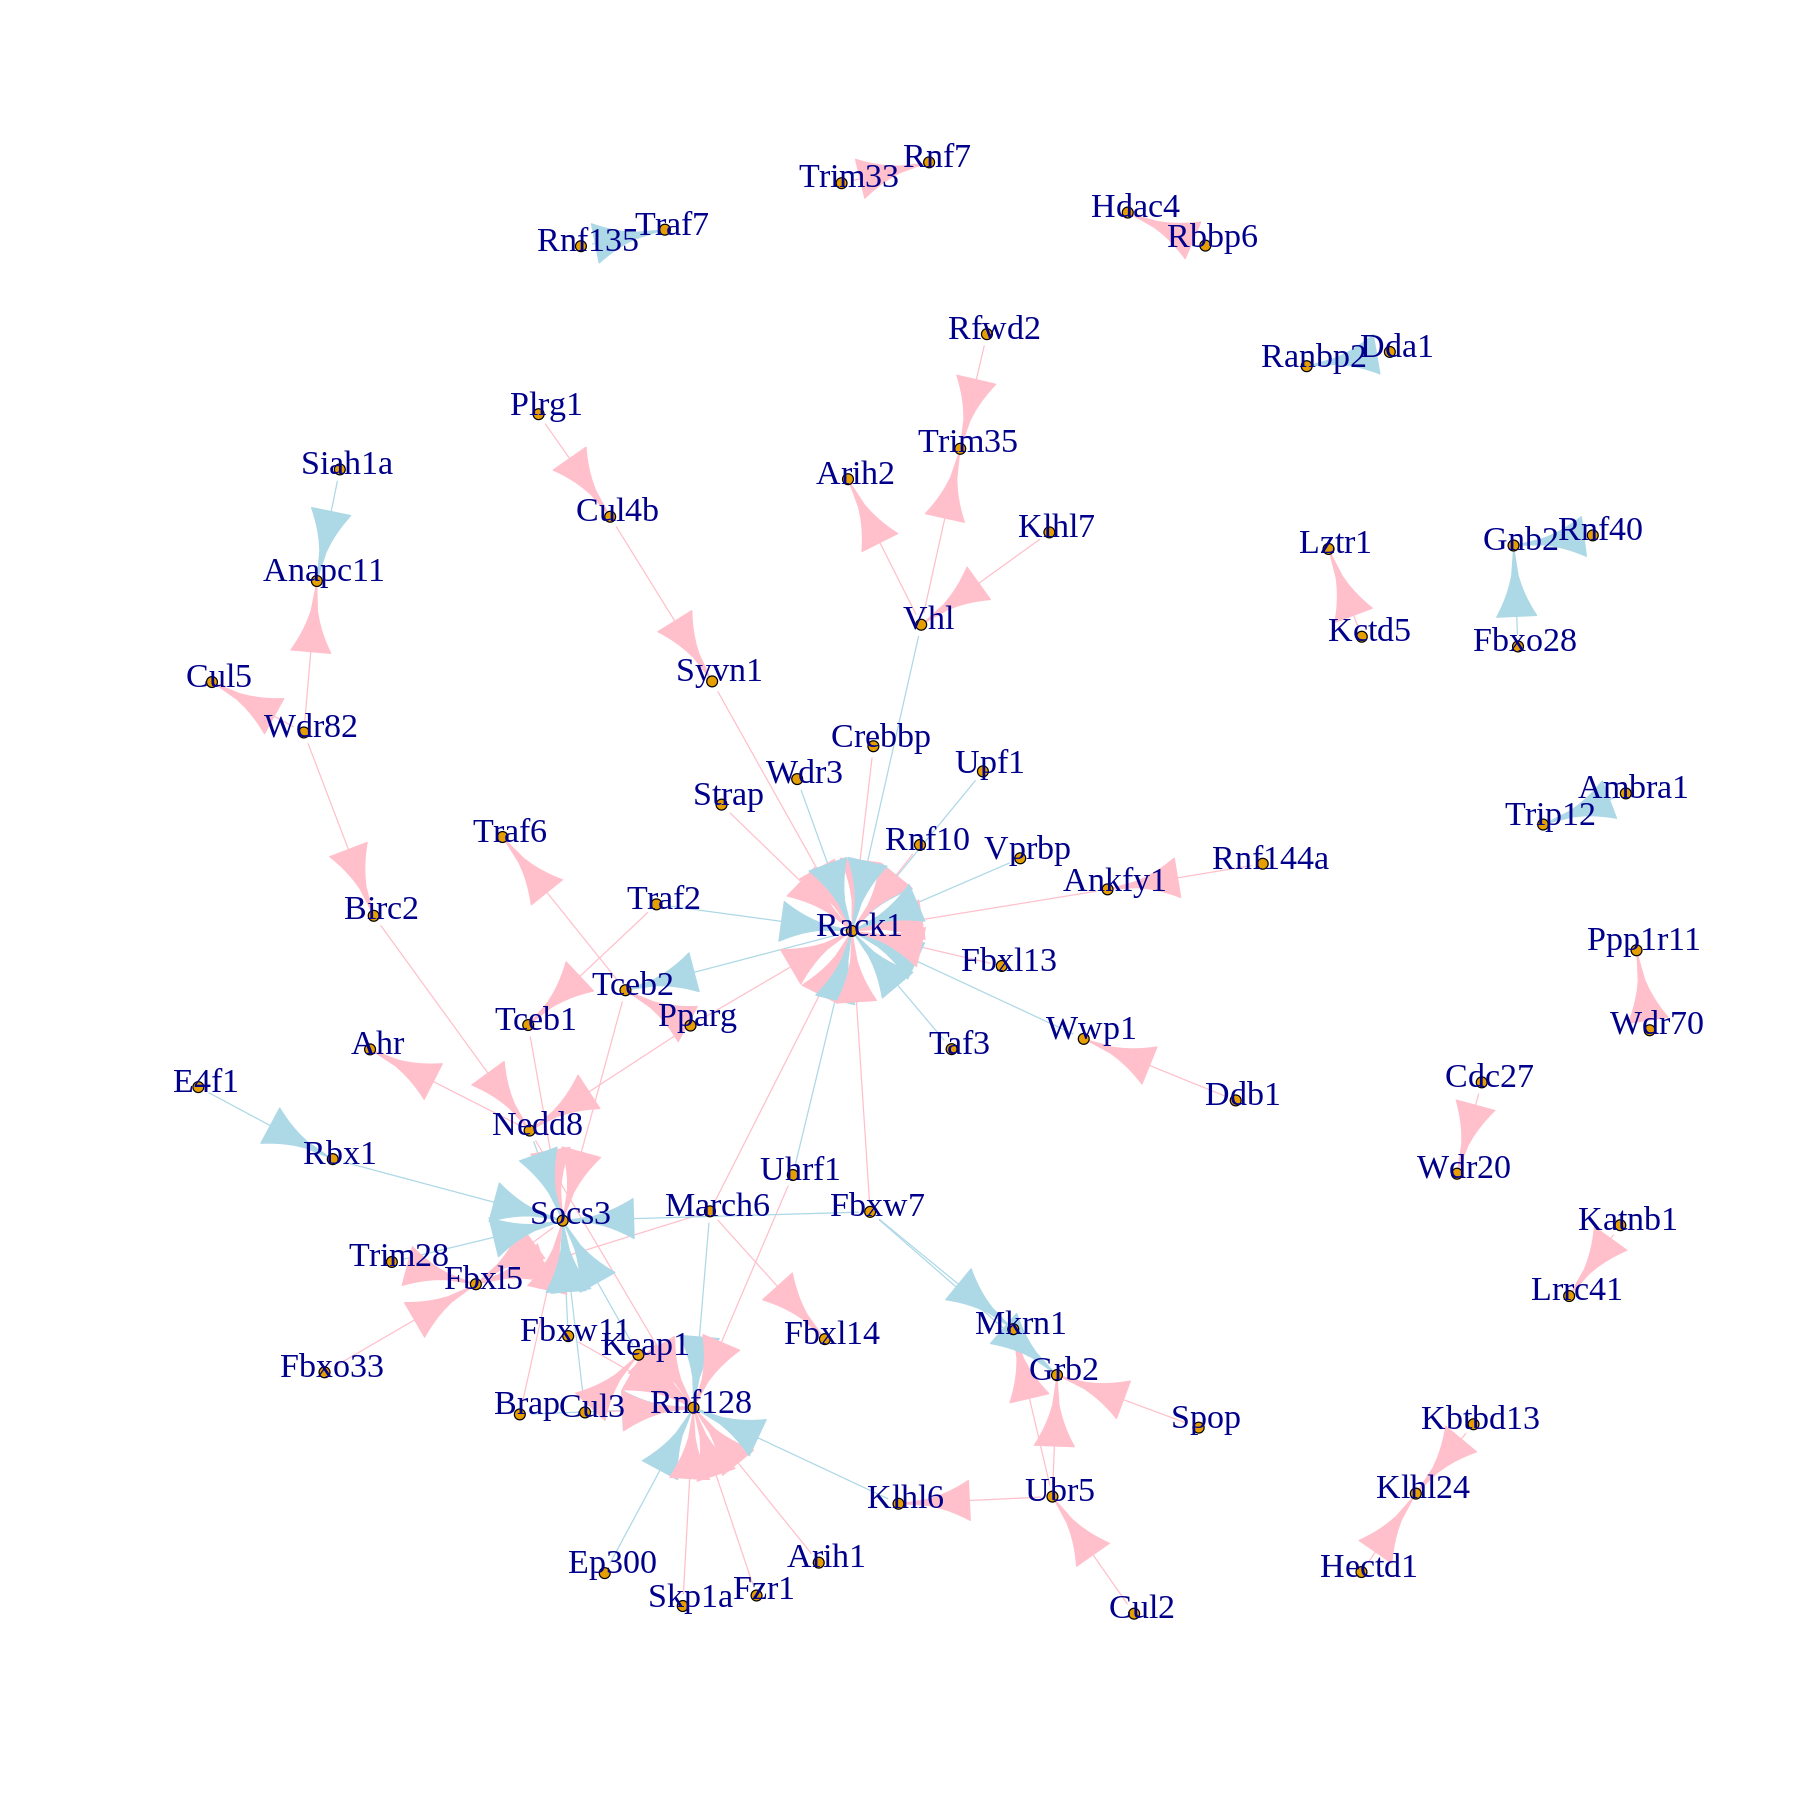

In [34]:
set.seed(123)

options(repr.plot.width=15, repr.plot.height=15)
df.g <- graph.data.frame(d = coefsAllE3sSgnMelted, directed = TRUE)
#df.g <- simplify(df.g)
V(df.g)$label.cex = 1.7
df.g
E(df.g)$sign = ifelse( coefsAllE3sSgnMelted$Value > 0, 1, -1)
E(df.g)$color <- ifelse( E(df.g)$sign > 0, "pink", "lightblue")

coords <- layout_(df.g, nicely())

plot(df.g, vertex.label = V(df.g)$name, vertex.size=1.5, vertex.label.dist=0.2, layout = coords)





In [56]:
kkk = colnames(coefsAllE3s)[colnames(coefsAllE3s) %in% rownames(coefsAllE3s)]
tmp = guideModules[kkk,]
tmp=tmp[order(tmp$GuideGroup),]
kkk=rownames(tmp)
kkk

[1] "Wwp1"   "Cul4b"  "Birc2"  "Syvn1"  "Ankfy1" "Ubr5"   "Rbx1"   "Keap1" 
 [9] "Tceb1"  "Vhl"    "Nedd8"  "Tceb2"  "Klhl6"  "Socs3"  "Rack1"

In [57]:
length(kkk)

[1] 15

png 
  2

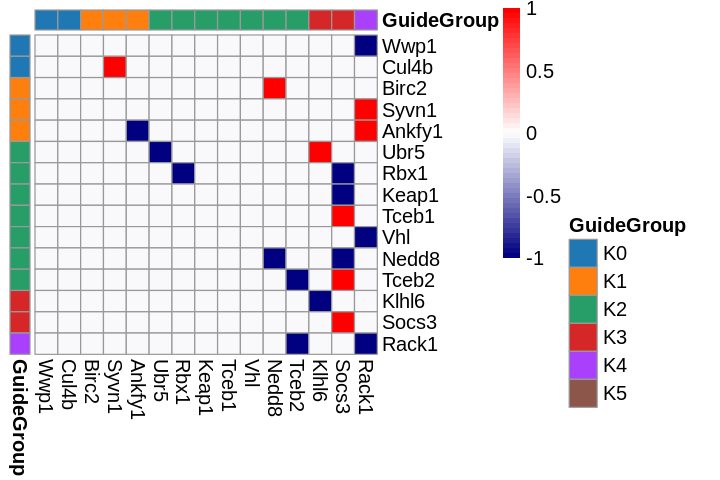

In [38]:
options(repr.plot.width=6, repr.plot.height=4)

onlyE3s = coefsAll[kkk,kkk]

annotDFcol <- guideModules[colnames(onlyE3s),]
annotDFrow <- guideModules[rownames(onlyE3s),]

annotDFcol$GuideColor = NULL
annotDFrow$GuideColor = NULL

onlyE3s[onlyE3s > 0] = 1
onlyE3s[onlyE3s < 0] = -1

xx <- pheatmap(onlyE3s, 
               treeheight_col=0, 
               treeheight_row=0, 
               fontsize = 12,
               clustering_method = "ward.D2",
               cluster_rows=FALSE,
               cluster_cols=FALSE, 
            annotation_col = annotDFcol,
            annotation_row = annotDFrow,
            annotation_colors = annoCols,
               color=colorRampPalette(c("navy", "white", "red"))(50)
        )

save_pheatmap_pdf(xx, "Figure_S3XX.pdf", width=6, height=4)

In [ ]:
c2 = cluster_edge_betweenness(df.g)


In [ ]:
modularity(c2)

In [ ]:
coords = layout_with_fr(df.g)

In [ ]:
V(df.g)$label.cex = 1.5
plot(c2, df.g,  vertex.size=1, layout=layout.fruchterman.reingold)

In [ ]:

 
# let's see if we have communities here using the 
# Grivan-Newman algorithm
# 1st we calculate the edge betweenness, merges, etc...
ebc <- edge.betweenness.community(g, directed=F)
 
# Now we have the merges/splits and we need to calculate the modularity
# for each merge for this we'll use a function that for each edge
# removed will create a second graph, check for its membership and use
# that membership to calculate the modularity
mods <- sapply(0:ecount(g), function(i){
  g2 <- delete.edges(g, ebc$removed.edges[seq(length=i)])
  cl <- clusters(g2)$membership
# March 13, 2014 - compute modularity on the original graph g 
# (Thank you to Augustin Luna for detecting this typo) and not on the induced one g2. 
  modularity(g,cl)
})
 
# we can now plot all modularities
plot(mods, pch=20)
 
# Now, let's color the nodes according to their membership
g2<-delete.edges(g, ebc$removed.edges[seq(length=which.max(mods)-1)])
V(g)$color=clusters(g2)$membership
 
# Let's choose a layout for the graph
g$layout <- layout.fruchterman.reingold
 
# plot it
plot(g, vertex.label=NA)
 
# if we wanted to use the fastgreedy.community agorithm we would do
fc <- fastgreedy.community(g)
com<-community.to.membership(g, fc$merges, steps= which.max(fc$modularity)-1)
V(g)$color <- com$membership+1
g$layout <- layout.fruchterman.reingold
plot(g, vertex.label=NA)